Reference https://github.com/vbartle/MML-Companion/blob/master/MML%20Python%2C%20Ch.07%20Continuous%20Optimization.ipynb

1 minf(x) by def gradientDescent (weak constraint) in 2D [py7.1], 3D [py7.2]

2 Constrainted Optimization and Lagrange Multipliers [py7.3]

3 Convex Optimization (concave)
- Linear/Quadratic Program [py7.4]
- Legendre-Fenchel Transform and Convex Conjugates [py7.5]

In [114]:
import numpy as np
import numpy.linalg as npl
import sympy
from sympy import *
import cvxpy as cp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse
from IPython.core.interactiveshell import InteractiveShell
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

In [12]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (5,5)

x**4 + 7*x**3 + 5*x**2 - 17*x + 3 

f'(x) = 0, x = [-4.5, -1.4, 0.7]
Corresponding f''(x) = [64.0, -25.3, 45.3]      minf(x) whose f''(x)<0
[[-4.5  0. ]
 [-1.4  1. ]
 [ 0.7  0. ]]


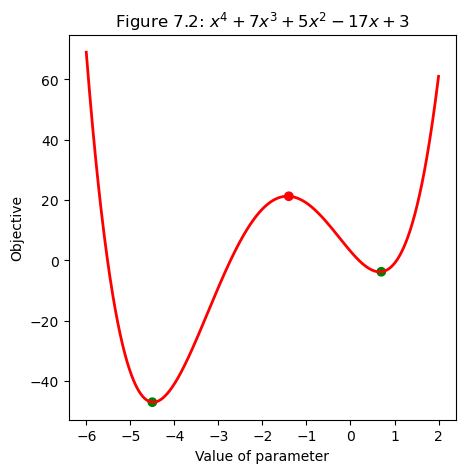

In [105]:
# py7.1: Find minf(x) in 2-D function

x = Symbol("x")
f = x**4 + 7*x**3 + 5 * x**2 - 17*x + 3
fLam = lambdify('x',f)
print(f,'\n')                      # Format: String. f Format:LeTax 
df_x = diff(f)
df_x
d2f_x = diff(df_x)
d2f_xLam = lambdify('x',d2f_x)
d2f_x

# Slope=0, maxf(x) or minf(x)
solution_df_x_0 = [round(float(r), 1) for r in nroots(df_x)]   # solve(f) outputs algebraic expression
print("f'(x) = 0, x =", solution_df_x_0)
# Second derivative test (describe concavity): f''(x)>0 upward->max, f''(x)>0 downward->min
d2f_x_val = [d2f_xLam(r) for r in solution_df_x_0]
d2f_x_val = [round(float(r),1) for r in d2f_x_val]
d2f_x_flag = [r<0 for r in d2f_x_val]
print("Corresponding f''(x) =", d2f_x_val, "     minf(x) whose f''(x)<0")
minsMaxs = np.column_stack([solution_df_x_0, d2f_x_flag])
print(minsMaxs)

linspace = np.linspace(-6,2,1000)
plt.plot(linspace,fLam(linspace), c = "r", lw = 2)
colors = ["g" if i == 0 else "r" for i in minsMaxs[:,1]]
y_scatter = [fLam(r) for r in solution_df_x_0]
plt.scatter(solution_df_x_0, y_scatter, c = colors)
plt.xlabel("Value of parameter")
plt.ylabel("Objective")
plt.title("Figure 7.2: " + r"$x^4 + 7x^3 + 5x^2 - 17x + 3$");

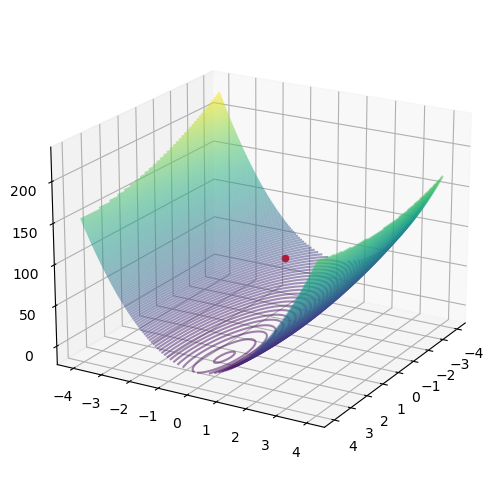

In [35]:
# py7.2: Find minf(x) in 3-D function

x, y = symbols('x y')
f = (np.dot((1/2)*np.array([x,y]),np.dot(np.vstack([[2,1],[1,20]]),np.vstack([x,y]))) \
     - np.dot(np.array([5,3]),np.vstack([x,y])))[0]
f = simplify(f)
fLam = lambdify('x,y',f)

scale3D = 4
n = 150
linspace = np.linspace(-scale3D, scale3D, n)
X, Y = np.meshgrid(linspace, linspace)
Z = fLam(X, Y)
point = np.array([-3, -1])
fig = plt.figure(figsize=(10, 10), tight_layout=True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1, 0], projection='3d')
ax.contour3D(X, Y, Z, n, alpha=0.5) 
ax.scatter3D(point[0], point[1], fLam(*point), color='r')
ax.view_init(20, 30);

Count of iteration: 26
Final Coordinate: [2.43780903 0.02822684]
First 5 steps:
 [[-3.         -1.        ]
 [-1.98        1.21      ]
 [-1.32125    -0.4237    ]
 [-0.635623    0.66389625]
 [-0.15899827 -0.15569942]]


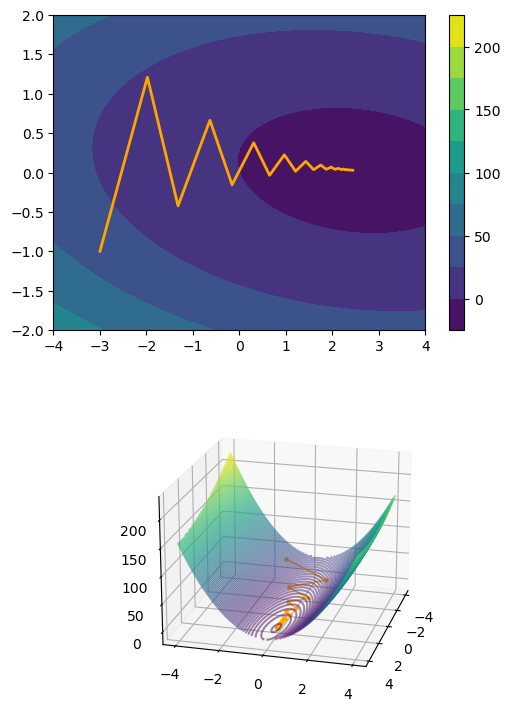

In [56]:
f1x = f.diff(x)
f1xLam = lambdify('x,y',f1x)
f1y = f.diff(y)
f1yLam = lambdify('x,y',f1y)
f1 = [f1x,f1y]
f1
f1Lam = lambdify('x,y',f1)
# f1Lam(*point)

def gradientDescent(gradient, point, gamma = .085, epsilon = .01, maxIter = 3000, initError = 10):
    # Initializing iteration. # gamma: step size, epsilon: stop threshold, if < epsilon, convergence
    x,y = point.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])
    # Initializing iteration.
    
    while npl.norm(error) > epsilon and currIter<maxIter: # npl.norm(error): ||error||_2=(Δx^2+Δy^2)^(1/2).
        currIter+=1 # Increment counter.
        prevX = currX.copy() # Track last X values for error.
        
        # Gradient descent equation
        currX -= gamma * np.array(gradient(x,y)) # ∇f(x,y) = [∂f/∂x, ∂f/∂y].
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        
        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.
        
    return currIter, currX, np.vstack(iterCoords)

finalIterCount, finalCoord, iterCoords = gradientDescent(f1Lam, point)
print("Count of iteration:", finalIterCount)  
print("Final Coordinate:", finalCoord)
print("First 5 steps:\n", iterCoords[:5])

fig = plt.figure(figsize=(6,9))

ax = fig.add_subplot(2, 1, 1)
plt.contourf(X,Y,Z, levels=10)
plt.colorbar()
plt.plot(iterCoords[:,0],iterCoords[:,1], lw = 2, c = "orange")
plt.axis([-4,4,-2,2]);

ax = fig.add_subplot(2, 1, 2, projection='3d')
n = 150
ax.contour3D(X,Y,Z, n, alpha = .5)

for i in iterCoords:
    pointTemp = i
    ax.scatter3D(pointTemp[0],pointTemp[1],fLam(*pointTemp),c = "orange", s = 5)
ax.plot(iterCoords[:,0],iterCoords[:,1],fLam(iterCoords[:,0],iterCoords[:,1]), c = "orange", lw = 1)
ax.view_init(20, 15);

Count of iteration: 78
Final Coordinate: [2.24186674 0.03922771]
First 5 steps:
 [[-3.         -1.        ]
 [-2.76       -0.48      ]
 [-2.54       -0.1728    ]
 [-2.334944    0.00712   ]
 [-2.14168864  0.11097088]]


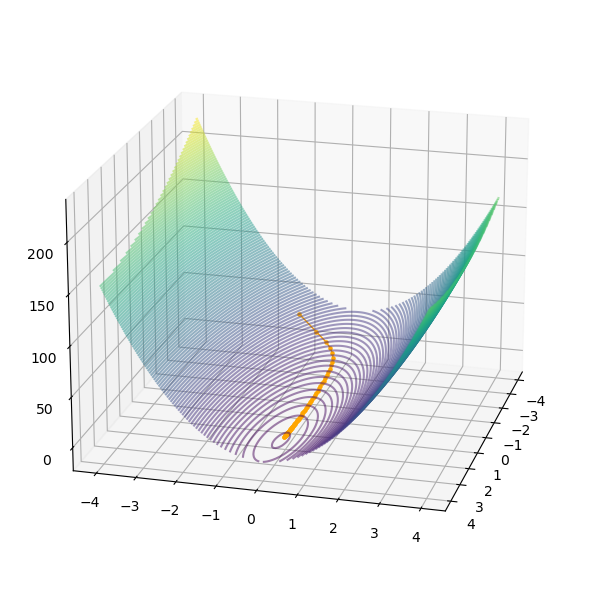

In [77]:
gamma = .02
finalIterCount, finalCoord, iterCoords = gradientDescent(f1Lam,point, gamma = gamma)
print("Count of iteration:", finalIterCount)  
print("Final Coordinate:", finalCoord)
print("First 5 steps:\n", iterCoords[:5])

fig = plt.figure(figsize = (12,16), tight_layout = True)
gs = GridSpec(2, 2)
n = 150
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)

for i in iterCoords:
    pointT = i
    ax.scatter3D(pointT[0],pointT[1],fLam(*pointT),c = "orange", s = 5)
ax.plot(iterCoords[:,0],iterCoords[:,1],fLam(iterCoords[:,0],iterCoords[:,1]), c = "orange", lw = 1)
ax.view_init(20, 15);

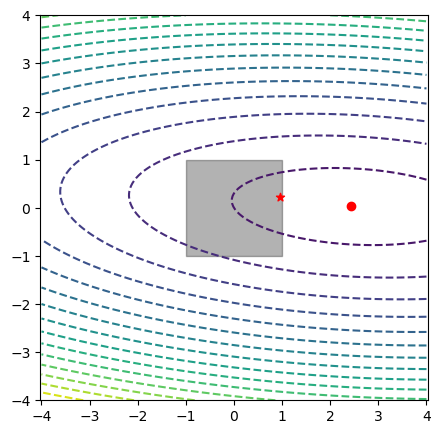

In [100]:
# py7.3: Constrainted Optimization and Lagrange Multipliers
bound = [-1,1]

finalIterCount, finalCoord, iterCoords = gradientDescent(f1Lam, point)
iTemp = np.vstack([i for i in iterCoords if min(bound)<=i[0] and i[0]<=max(bound)])
iTemp
a = np.vstack([[ind,npl.norm(i)] for ind,i in enumerate(iTemp)])
a
minVal = iTemp[int(a[a[:,1].argsort()][::-1][0][0])]           # Find max of npl.norm(iTemp).
minVal  # Distance farest, not minimize.
plt.contour(X,Y,Z, levels=20, linestyles = "dashed")
plt.fill_between(np.linspace(-1,1,100),np.linspace(-1,-1,100),np.linspace(1,1,100), alpha = .3, ec = 'k', fc = 'k')
plt.scatter(minVal[0],minVal[1], marker = "*", c = "r")
plt.scatter(finalCoord[0],finalCoord[1], marker = "o", c = "r")
plt.axis('equal');

x* = [-1.  -0.5]
f(x*) = -4.5
Lagrange λ = [0.  2.5 0.  0. ]


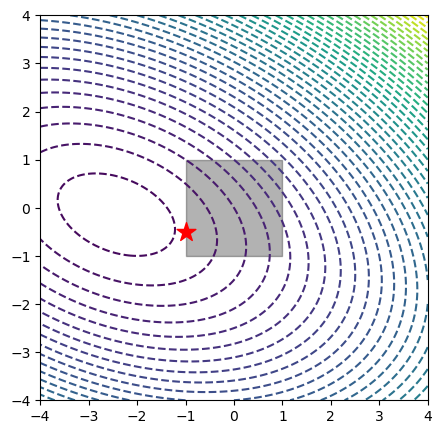

In [136]:
# py7.4: Convex Optimization_Quadratic Program

x, y = symbols('x y')
f = (np.dot((1/2)*np.array([x,y]), np.dot(np.vstack([[2,1],[1,4]]),np.vstack([x,y]))) \
    + np.dot(np.array([5,3]),np.vstack([x,y])))[0]
f
fLam = lambdify('x,y',f)

Q = np.vstack([[2,1],[1,4]], dtype=float)
c = np.array([5,3], dtype=float)
x = cp.Variable(2)

A = np.array([[1, 0],
              [-1, 0],
              [0, 1],
              [0, -1]], dtype=float)
b = np.array([1, 1, 1, 1], dtype=float)

obj = 0.5*cp.quad_form(x, Q) + c @ x
cons = [A @ x <= b]
prob = cp.Problem(cp.Minimize(obj), cons)
prob_solve = prob.solve()

print("x* =", x.value) 
print("f(x*) =", prob.value)
print("Lagrange λ =", cons[0].dual_value)

linspace = np.linspace(-scale3D,scale3D,n) 
X,Y = np.meshgrid(linspace,linspace)
Z = fLam(X,Y)
plt.contour(X,Y,Z, levels = 50, linestyles = 'dashed')
plt.fill_between(np.linspace(-1,1,100),np.linspace(-1,-1,100),np.linspace(1,1,100), alpha = .3, ec = 'k', fc = 'k')
plt.scatter(*x.value,marker="*",c="r",s=200);

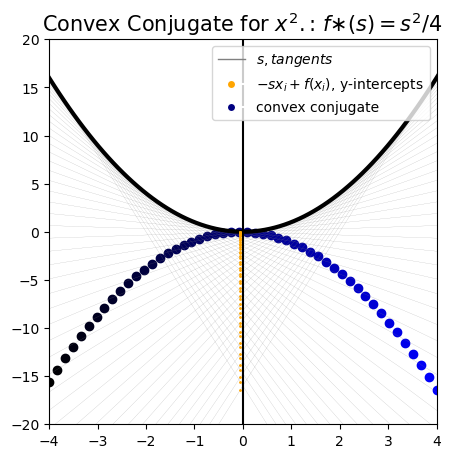

In [144]:
# py7.5: Legendre-Fenchel Transform and Convex Conjugates
# Convex Conjugates of x^2, learned from case 7.7

x = Symbol('x')
b,d = [1.5, .5]
f = x**2
fLam = lambdify('x',f)
f
f1 = diff(f)
f1Lam = lambdify('x', f1)
f1

linspace = np.linspace(-5,5,100)
linspace2 = np.linspace(-4,4,50) 
m = interp1d([-4,4],[0,1]) # Interpolation for color mapping.
eqLine = lambda m, x, x0, y0: m*(x-x0)+y0

for i in linspace2:
    currY = fLam(i)
    currSlope = f1Lam(i)
    
    # Plotting s, the tangents.
    plt.plot(linspace, eqLine(currSlope, linspace, i, currY), c = "grey", lw = .1)
    
    # Plotting -sx_i + f(x_i), the y-intercepts.
    coords = np.hstack([np.vstack(linspace),np.vstack(eqLine(currSlope, linspace, i, currY))])
    plt.scatter(*coords[(np.abs(coords[:,0]-0)).argmin()], c = "orange", s = 1, zorder=10)
    
    # Plotting -c, f*(s), the convex conjugate.
    plt.scatter(i,coords[(np.abs(coords[:,0]-0)).argmin()][1], c = np.vstack([0,0,m(i)]).T)
    
plt.plot(linspace,fLam(linspace), c = 'k', lw = 3)
plt.plot(np.linspace(0,0,10),np.linspace(-100,100,10), c = "k")
plt.axis([-4,4,-20,20])

customLegend = [Line2D([0],[0], color = "grey", lw = 1, label = r"$s, tangents$"),
                Line2D([0],[0], marker = 'o', color = "w", label = r"$-sx_i+f(x_i)$, y-intercepts",
                      markerfacecolor = 'orange'),
                Line2D([0],[0], marker = 'o', color = "w", label = "convex conjugate",
                      markerfacecolor = 'navy')]

plt.legend(handles = customLegend, loc=1)
plt.title(r'Convex Conjugate for $x^2.$: $f∗(s)=s^2/4$', size = 15);